In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import seaborn as sns

In [2]:
def read_data(path):
    df = pd.read_csv(path)
    df = df.replace('x', np.nan)
    return df

In [3]:
def print_missing_data(df):
    feature_counts = df.count()
    feature_percentages = feature_counts / len(df) * 100
    for feature, count, percentage in zip(feature_counts.index, feature_counts, feature_percentages):
        print(f"{feature: <{18}} {count}   {percentage:.2f} %")


In [4]:
class NaiveBayes:

    def __init__(self) -> None:
        self.class_labels = None
        self.class_probs = None
        self.feature_probs = None


    def calculate_class_probs(self, y_train):
        class_counts = y_train.value_counts()
        self.class_probs = class_counts / len(y_train)
        self.class_labels = self.class_probs.index

    def calculate_feature_probs(self, X_train, y_train):
        self.feature_probs = {}
        for label in self.class_labels:

            class_data = X_train[y_train == label]

            self.feature_probs[label] = {}

            for feature in X_train.columns:
                self.feature_probs[label][feature] = (class_data[feature].value_counts() + 1) / (len(class_data) + len(X_train[feature].unique()))
                self.feature_probs[label][feature]['default'] = 1 / (len(class_data) + len(X_train[feature].unique()))

    def train(self, X_train, y_train):
        self.calculate_class_probs(y_train)
        self.calculate_feature_probs(X_train, y_train)

    def posterior_prob_of_calss(self, class_label, instance):
        prob = self.class_probs[class_label]

        for feature in instance.index:
        
            feature_value = instance[feature]
            if feature_value in self.feature_probs[class_label][feature]:
                prob *= self.feature_probs[class_label][feature][feature_value]
            else:
                prob *= self.feature_probs[class_label][feature]['default']
        return prob

    def posterior_probs(self, instance):
        probs = []
        for label in self.class_labels:
            probs.append(self.posterior_prob_of_calss(label, instance))
        return probs
    
    def predict(self, instance):
        probs = self.posterior_probs(instance)
        return self.class_labels[np.argmax(probs)]
            
    def test(self, X_test):
        return [self.predict(instance) for _, instance in X_test.iterrows()]
    
    def get_class_labels(self):
        return self.class_labels


In [5]:
def plt_confusion_matrix(true_labels, pred_labels, labels):
    
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
def correlation_matrix(df, target):
    X = df.drop(target, axis=1)
    correlation_matrix = X.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, annot_kws={"fontsize": 5})
    plt.title('Correlation Matrix')
    plt.xticks(fontsize=10, ha='right', fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

In [7]:
def train_and_test(df, target, NB=GaussianNB):
    
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    model = NaiveBayes()
    model.train(X_train, y_train)
    predicted_labels = model.test(X_test)

    print('From scratch:')
    plt_confusion_matrix(y_test, predicted_labels, labels=model.get_class_labels())
    print(classification_report(y_test, predicted_labels))

    model =  NB()
    model.fit(X_train, y_train)
    predicted_labels = model.predict(X_test)

    print('With library:')
    plt_confusion_matrix(y_test, predicted_labels, labels=df[target].unique())
    print(classification_report(y_test, predicted_labels))

GENDER             309   100.00 %
AGE                308   99.68 %
SMOKING            308   99.68 %
YELLOW_FINGERS     309   100.00 %
ANXIETY            309   100.00 %
PEER_PRESSURE      308   99.68 %
CHRONIC DISEASE    307   99.35 %
FATIGUE            308   99.68 %
ALLERGY            308   99.68 %
WHEEZING           308   99.68 %
ALCOHOL CONSUMING  307   99.35 %
COUGHING           308   99.68 %
SHORTNESS OF BREATH 308   99.68 %
SWALLOWING DIFFICULTY 307   99.35 %
CHEST PAIN         309   100.00 %
LUNG_CANCER        309   100.00 %

From scratch:


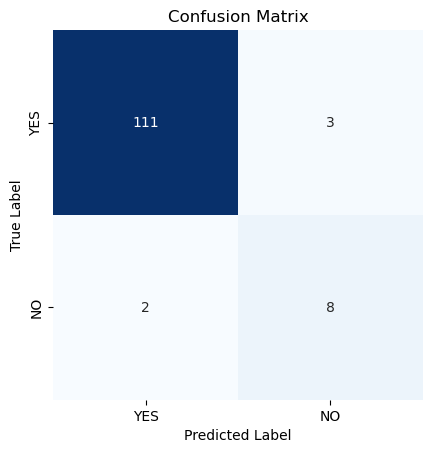

              precision    recall  f1-score   support

          NO       0.80      0.73      0.76        11
         YES       0.97      0.98      0.98       113

    accuracy                           0.96       124
   macro avg       0.89      0.85      0.87       124
weighted avg       0.96      0.96      0.96       124

With library:


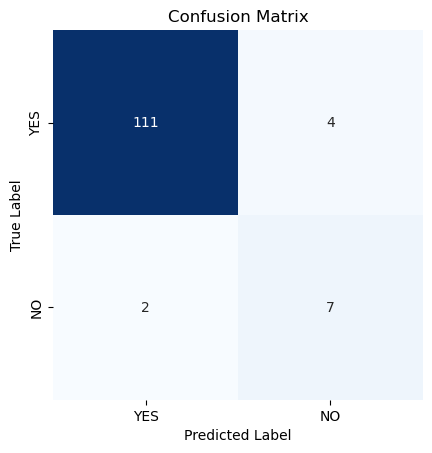

              precision    recall  f1-score   support

          NO       0.78      0.64      0.70        11
         YES       0.97      0.98      0.97       113

    accuracy                           0.95       124
   macro avg       0.87      0.81      0.84       124
weighted avg       0.95      0.95      0.95       124



In [9]:
df = read_data('../data/survey lung cancer.csv')
df['GENDER'].replace({'F': 0, 'M': 1}, inplace=True)

print_missing_data(df)
print()

df = df.fillna(df.mode().iloc[0])

train_and_test(df, 'LUNG_CANCER')

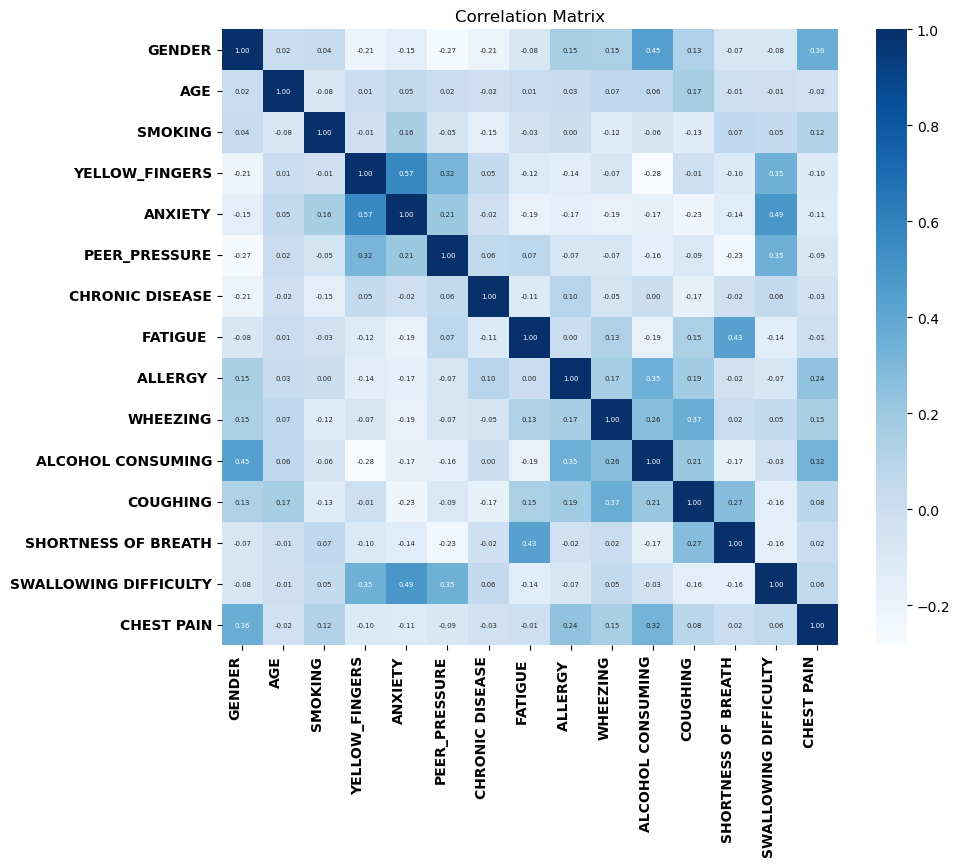

In [10]:
correlation_matrix(df, 'LUNG_CANCER')

url_length         100077   100.00 %
n_dots             100077   100.00 %
n_hypens           100077   100.00 %
n_underline        100077   100.00 %
n_slash            100077   100.00 %
n_questionmark     100077   100.00 %
n_equal            100077   100.00 %
n_at               100077   100.00 %
n_and              100077   100.00 %
n_exclamation      100077   100.00 %
n_space            100077   100.00 %
n_tilde            100077   100.00 %
n_comma            100077   100.00 %
n_plus             100077   100.00 %
n_asterisk         100077   100.00 %
n_hastag           100077   100.00 %
n_dollar           100077   100.00 %
n_percent          100077   100.00 %
n_redirection      100077   100.00 %
phishing           100077   100.00 %

From scratch:


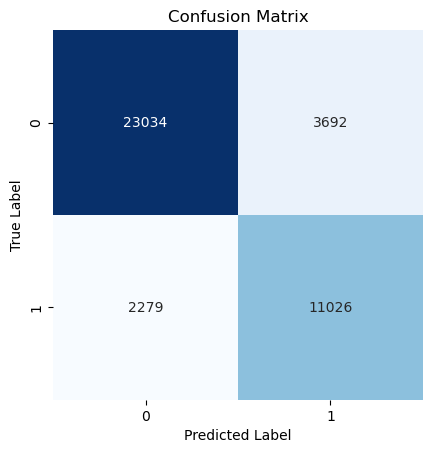

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     25313
           1       0.83      0.75      0.79     14718

    accuracy                           0.85     40031
   macro avg       0.85      0.83      0.84     40031
weighted avg       0.85      0.85      0.85     40031

With library:


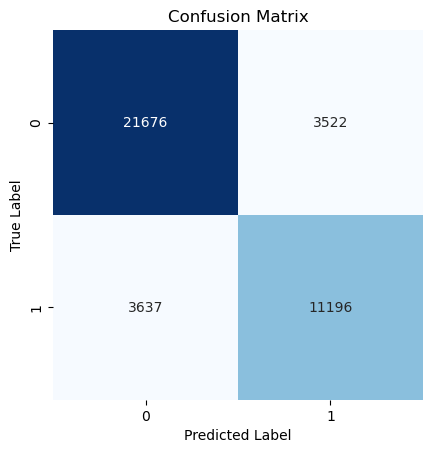

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     25313
           1       0.75      0.76      0.76     14718

    accuracy                           0.82     40031
   macro avg       0.81      0.81      0.81     40031
weighted avg       0.82      0.82      0.82     40031



In [11]:
df = read_data('../data/web-page-phishing.csv')

print_missing_data(df)
print()

train_and_test(df, 'phishing', NB=BernoulliNB)

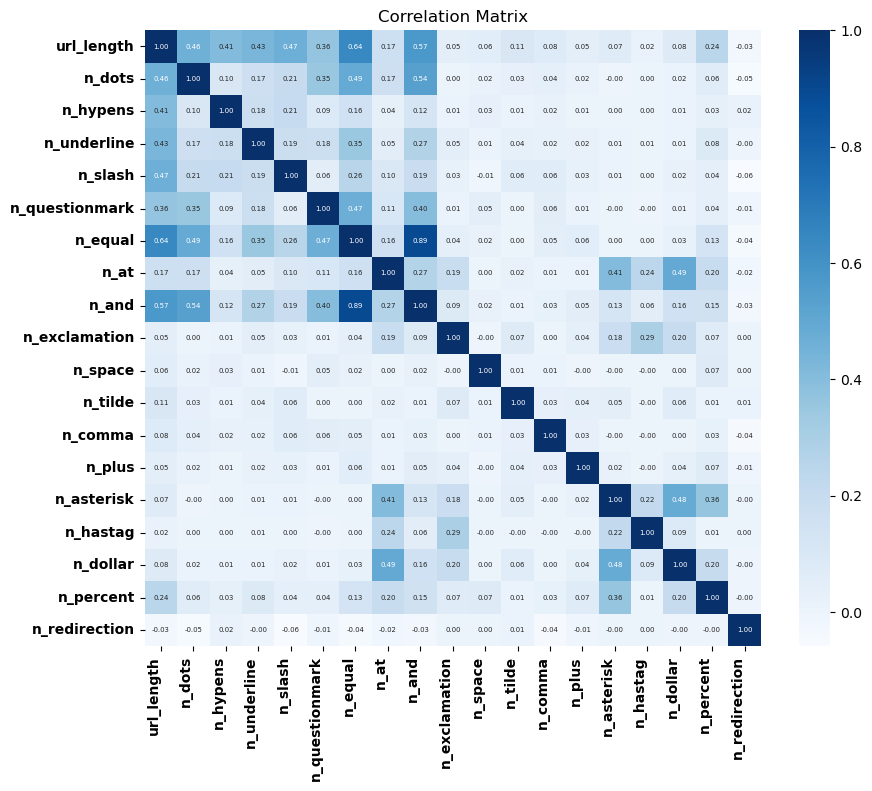

In [12]:
correlation_matrix(df, 'phishing')